In [12]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
%matplotlib inline


# NS-Datenimport und Transposing für Europa von indecis.eu 
data = xarray.open_dataset('C:/Users/PfitznerD/Desktop/Studium/WS20_21/Angew.Sys2/Gruppenprojekt/rti_year.nc')
tas = data.rti
tast = tas.transpose('time','latitude', 'longitude')

#Auswahl 1971 bis 2000 und Berechnung und Plotten für Europa
tas_prep = tast.sel(time=slice('1971-01-01','2000-12-31')).mean()

#Einlesen csv
data1 = pd.read_csv('C:/Users/PfitznerD/Desktop/Studium/IP/Niederschlagsdaten/Stufenbach_Andritz/Andritz.csv', sep = ';')

#convert NS-Werte in float
data1_value = data1.Value.astype(float)
data1_valuesum = data1_value*365

#convert Datum in datetime
date_data1 = pd.to_datetime(data1['Date'])

#convert datum.series in xarray
date_sorted = date_data1.to_xarray()

#sortiere datum
date_sorted = np.sort(date_sorted.values)

#bilde xarray aus gesamten csv-datensatz
tast_data1 = xarray.DataArray(data1_valuesum, dims=['date'],
                           coords={'date': date_sorted},
                           attrs=dict(
                                       description="Niederschlag",
                                       units="mm",),)


tas_prep_Andritz = tast_data1.sel(date=slice('1971-01-01','2000-12-31')).mean()

#Berechne Anomalien
tas_anom = (tast - tas_prep)
tas_anom_andritz = (tast_data1 - tas_prep_Andritz)

#Slice Periode
tas_anom_yearly = tas_anom.sel(time=slice('1970-01-01',None)).resample(time='Y').mean(dim='time')
tas_anom_yearly_andritz = tas_anom_andritz.sel(date=slice('1970-01-01',None)).resample(date='Y').mean(dim=('date'))

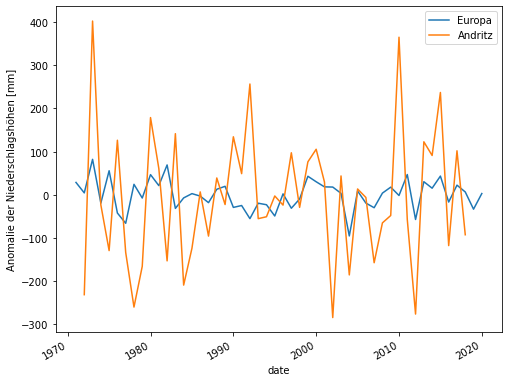

In [13]:
#erstelle Grafik
axes = plt.axes()
axes.figure.set_size_inches(8, 6)
tas_anom_yearly.mean(dim=('latitude','longitude')).plot(ax=axes, label='Europa')
tas_anom_andritz.sel(date=slice('1970-01-01',None)).resample(date='Y').mean(dim=('date')).plot(ax=axes, label='Andritz')
#plt.title('Precipitation anomalies from a 1971-2000 climatology')
plt.ylabel('Anomalie der Niederschlagshöhen [mm]')
plt.legend()
